## Preprocessing

## Alternative preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Importing the dataset
dataset = pd.read_excel('Dataset3.xlsx')
X = dataset[['Charge_type', 'Charge_size', 'Standoff_distance']]
y = dataset['Incident_pressure']
feature_names = X.columns
print (X)

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Charge_type'])], remainder='passthrough')
X = ct.fit_transform(X)

#Getting the feature names
new_feature_names = ct.get_feature_names_out(feature_names)
print (new_feature_names)
print (X)

#Turning back into a dataframe
X = pd.DataFrame(X, columns= new_feature_names)
print (X)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print (X_train)

    Charge_type  Charge_size  Standoff_distance
0           TNT          0.5                1.5
1           TNT          0.5                2.5
2           TNT          0.5                3.5
3           TNT          0.5                4.5
4           TNT          0.5                5.5
..          ...          ...                ...
541       CompB         25.0               16.0
542       CompB         25.0               17.0
543       CompB         25.0               18.0
544       CompB         25.0               19.0
545       CompB         25.0               20.0

[546 rows x 3 columns]
['encoder__Charge_type_CompB' 'encoder__Charge_type_TNT'
 'remainder__Charge_size' 'remainder__Standoff_distance']
[[ 0.   1.   0.5  1.5]
 [ 0.   1.   0.5  2.5]
 [ 0.   1.   0.5  3.5]
 ...
 [ 1.   0.  25.  18. ]
 [ 1.   0.  25.  19. ]
 [ 1.   0.  25.  20. ]]
     encoder__Charge_type_CompB  encoder__Charge_type_TNT  \
0                           0.0                       1.0   
1                  

<AxesSubplot:>

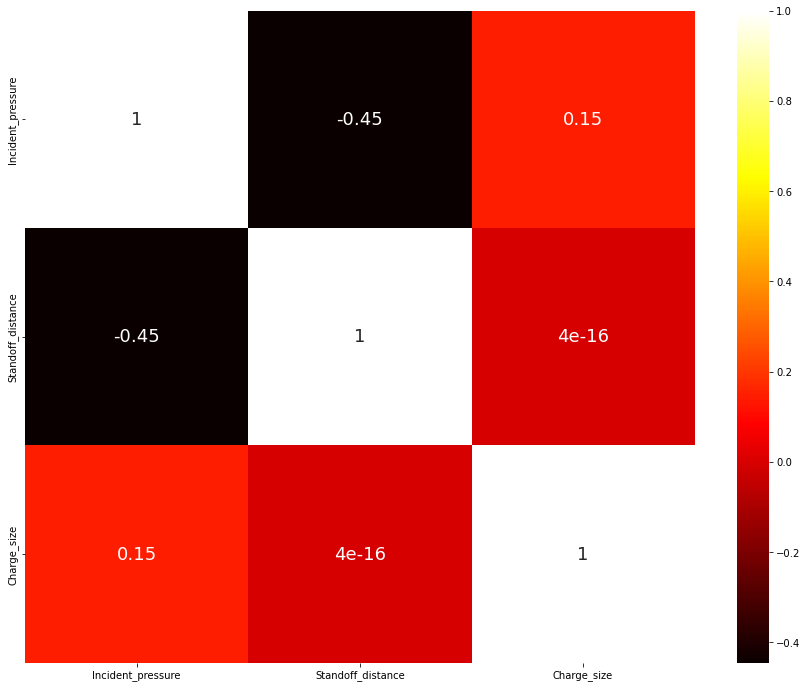

In [5]:
import seaborn as sn
from pandas import DataFrame

t=['Charge_type', 'Charge_size', 'Standoff_distance','Incident_pressure']

s=abs(dataset[t].corr()['Incident_pressure'])
p=s.sort_values(ascending=True)
p.index

t=p.index[::-1]
df = pd.DataFrame(dataset[t],columns=t)
fig, ax = plt.subplots(figsize=(15,12),sharex=True, sharey=True) 
corrMatrix = dataset.corr()
sn.heatmap(corrMatrix, cmap="hot", annot=True,annot_kws={"size": 18},ax=ax)

     Charge type_CompB  Charge type_TNT  Charge size  Standoff distance
0                  0.0              1.0          0.5                1.5
1                  0.0              1.0          0.5                2.5
2                  0.0              1.0          0.5                3.5
3                  0.0              1.0          0.5                4.5
4                  0.0              1.0          0.5                5.5
..                 ...              ...          ...                ...
541                1.0              0.0         25.0               16.0
542                1.0              0.0         25.0               17.0
543                1.0              0.0         25.0               18.0
544                1.0              0.0         25.0               19.0
545                1.0              0.0         25.0               20.0

[546 rows x 4 columns]
     Peak incident pressure
0                   283.258
1                   163.904
2                   135.678


<AxesSubplot:>

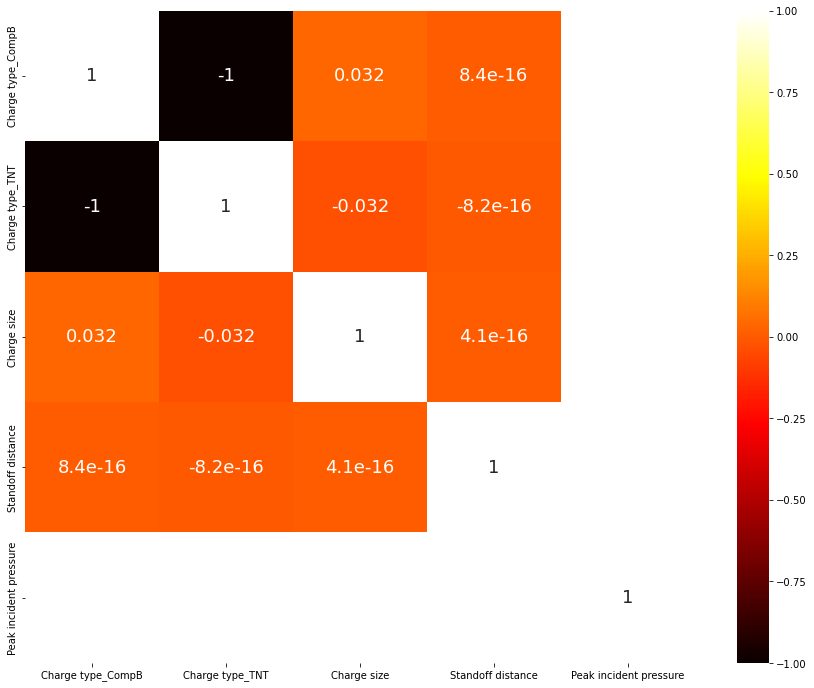

In [14]:
import seaborn as sn

#Turning back into a dataframe
y = pd.DataFrame(y)

print (X)
print (y)

#Turning back into a dataframe
X.columns = ['Charge type_CompB', 'Charge type_TNT','Charge size', 'Standoff distance']

#Turning back into a dataframe
y.columns = ['Peak incident pressure']


print (X)
print (y)

#from pandas import DataFrame
dataset1 = pd.concat([X, y])

t=dataset1.columns

print (t)

#s=abs(dataset1[t].corr())
#p=s.sort_values(by = dataset1[t], ascending=True)
#p.index

#t=p.index[::-1]
#df = pd.DataFrame(dataset1[t],columns=t)
fig, ax = plt.subplots(figsize=(15,12),sharex=True, sharey=True) 
corrMatrix = dataset1.corr()
sn.heatmap(corrMatrix, cmap="hot", annot=True,annot_kws={"size": 18},ax=ax)

In [6]:
corrMatrix.style.background_gradient(cmap='coolwarm') 

,Incident_pressure,Standoff_distance,Charge_size
Incident_pressure,1.000000,-0.445655,0.146139
Standoff_distance,-0.445655,1.000000,0.000000
Charge_size,0.146139,0.000000,1.000000


## Calling the XGB Regressor

In [2]:
from xgboost import XGBRegressor
regressor = XGBRegressor(random_state = 67)

## Applying Grid Search to find the best model and the best parameters

In [3]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 400, 500], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25],'gamma': [1, 0.1, 0.01, 0.001]}]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

Best Accuracy: 0.980682599902247
Best Parameters: {'gamma': 1, 'max_depth': 3, 'n_estimators': 100}


## Training the XGB Regression model on the Training set

In [3]:
regressor = XGBRegressor(n_estimators = 1100,
                         max_depth = 3,
                         gamma = 1, 
                         learning_rate = 0.1,
                         random_state = 67)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=67,
             reg_alpha=0, reg_lambda=1, ...)

## Save the model to disk

In [4]:
filename = 'finalized_model_XGB.sav'
pickle.dump(regressor, open(filename, 'wb'))

## Create a KFold object with 5 splits 

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = False)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
print (scores)
print (scores.mean())

[0.99421724 0.99378536 0.9912528  0.97540676 0.98398149]
0.9877287305919304


## Load the model from disk

In [ ]:
loaded_regressor = pickle.load(open(filename, 'rb'))

## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
file = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)
print(file)

[[ 109.27  108.77]
 [7961.11 8013.45]
 [ 145.18  144.28]
 [ 377.8   274.19]
 [ 939.99 1007.45]
 [ 196.49  196.22]
 [ 132.69  131.96]
 [ 170.28  171.51]
 [1727.76 1731.23]
 [ 136.93  136.45]
 [ 298.15  309.78]
 [ 536.3   524.14]
 [ 130.63  130.67]
 [ 138.44  130.75]
 [ 376.81  354.25]
 [ 121.55  119.43]
 [ 117.53  117.43]
 [ 134.21  124.04]
 [ 111.67  113.14]
 [ 120.24  120.34]
 [3157.51 3132.78]
 [ 124.76  125.44]
 [ 125.01  124.65]
 [ 114.41  113.93]
 [ 296.69  300.84]
 [ 112.38  111.93]
 [ 284.64  263.48]
 [ 124.18  123.06]
 [ 152.91  151.21]
 [ 118.95  119.65]
 [ 210.86  207.89]
 [ 146.86  144.44]
 [ 120.98  118.21]
 [ 103.96  103.93]
 [ 174.71  173.54]
 [ 116.51  116.69]
 [ 258.94  219.04]
 [ 139.57  139.79]
 [ 123.14  124.99]
 [ 134.39  133.57]
 [ 117.46  116.81]
 [ 132.35  132.17]
 [ 546.43  524.32]
 [ 153.43  152.22]
 [ 261.67  241.93]
 [ 152.96  152.24]
 [ 158.94  156.44]
 [ 118.78  118.46]
 [ 111.    110.56]
 [2797.45 2751.58]
 [ 114.38  114.36]
 [ 210.88  205.96]
 [ 130.3   1

## SHAP

In [7]:
import shap
print (shap.__version__)

0.41.0


In [8]:
# Create object that can calculate shap values for an ensemble tree model
explainer = shap.TreeExplainer(regressor)

In [9]:
# Calculate Shap values
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


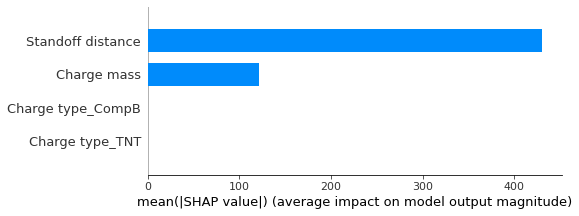

None


<Figure size 1440x360 with 0 Axes>

In [10]:
#Summary plot type 1
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names = features, plot_type="bar")
print (plt.gcf().set_size_inches(20,5))

[1]
labels ['']


Text(482.5464500000001, 0.5, 'Feature value')

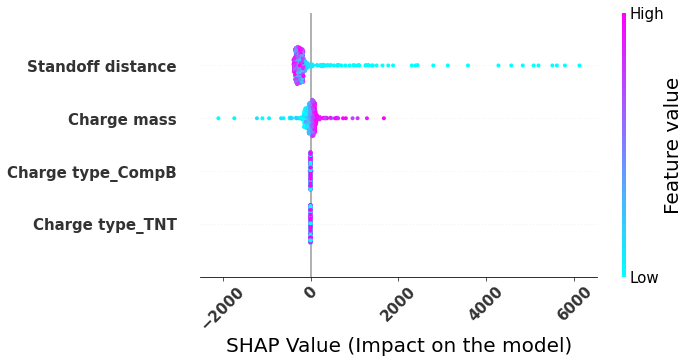

In [11]:
#Summary plot type 2
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
print (plt.get_fignums())
print ("labels",plt.get_figlabels())
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
#plt.xlim([-3000,7000])
plt.xticks(rotation=45)
#cb = plt.colorbar()
#cb.set_ticks([2,19])

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
#cb_ax.set_aspect(aspect = 1)
#print (cb_ax.get_xlim())
#print (cb_ax.get_ylim())
#print (cb_ax.get_xbound())
#print (cb_ax.get_ybound())
#cb_ax.set_xlim(0,0.0001)

#cb.set_xticklabels(['Low', 'High'])
#ax.cb.set_label("Feature Values",fontsize = 20)

AttributeError: 'function' object has no attribute 'info'

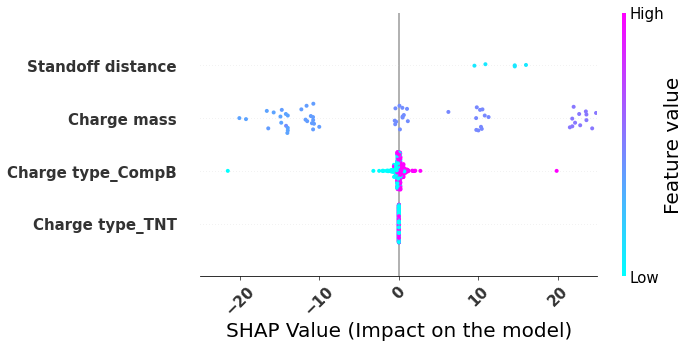

In [21]:
#Summary plot type 3
shap.summary_plot(shap_values, X_train, feature_names=features, show=False,cmap = "cool")
# Get the current figure and axes objects.
fig = plt.gcf()
plt.gcf().set_size_inches(10,5)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=20)
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.xlim([-25,25])
plt.xticks(rotation=45)

# Get colorbar
cb_ax = fig.axes[1] 

# Modifying color bar parameters
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Feature value", fontsize=20)
shap.summary_plot.info()

In [26]:
features_list = ['encoder_Charge_type_CompB', 'encoder_Charge_type_TNT']
shap_values_fl = pd.DataFrame(shap_values)
shap_values_fl = shap_values_fl[0:2]
X_train_fl = X_train[features_list]
shap.summary_plot(np.array(shap_values_fl), X_test_fl, feature_names=features, show=False,cmap = "cool")

KeyError: "None of [Index(['encoder_Charge_type_CompB', 'encoder_Charge_type_TNT'], dtype='object')] are in the [columns]"

In [12]:
print (features)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    #feature_list = df.columns
    shap_v.columns = features
    df.columns = df_features
    print ("features",features)
    print ("df_features", df_features)
    #df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i,j in features, df_features:
        print (i,j)
        b = np.corrcoef(shap_v[i],df[j])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(features),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(8,5),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)", fontsize=20)
    ax.set_ylabel("Features", fontsize=20)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
ABS_SHAP(shap_values,X_train)

['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']


NameError: name 'df_features' is not defined

(array([939.99, 939.99]),
 [Text(939.9927368164062, 1, '$f(x)$'),
  Text(939.9927368264063, 1, '$ = 939.993$')])

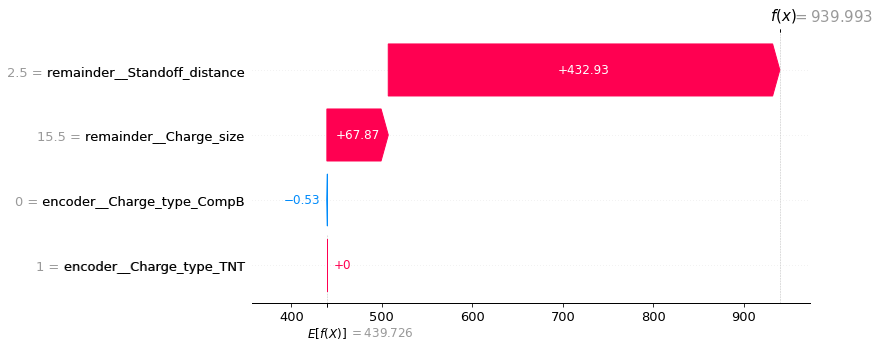

In [12]:
#print (X_test)
features = ['Charge type_CompB', 'Charge type_TNT', 'Charge mass', 'Standoff distance']
#print (X_test)
#Waterfall Plot (for an instance)
explainer2 = shap.Explainer(regressor.predict, X_test)
#X_test.columns=features
shap_values2 = explainer2(X_test)

shap.waterfall_plot(shap_values2[4], show=False)
#plt.gcf()
#print (plt.get_fignums())


plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')
#plt.tick_params(y, pad = 10)
#plt.xlabel("SHAP Value (Impact on the model)", fontsize=30)
#plt.yticks(fontsize = 15,weight='bold')
#print (plt.bar_label())
#left, right = plt.xlim()
#print (left, right)
#plt.xlim(left = 450)
#plt.xticks(fontsize = 15,weight='bold')

.values =
array([-2.21e-01,  0.00e+00, -8.74e+01, -2.40e+02])

.base_values =
439.72631553649904

.data =
array([ 1.,  0.,  4., 15.])

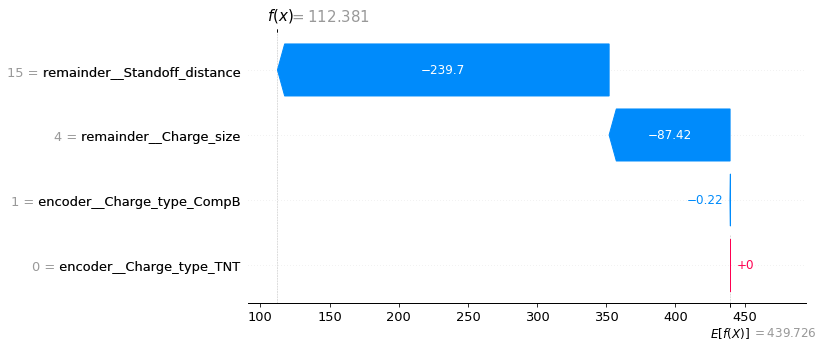

In [27]:
shap.waterfall_plot(shap_values2[25], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')
shap_values2[25]

(array([271.22, 271.22]),
 [Text(271.2205505371094, 1, '$f(x)$'),
  Text(271.2205505471094, 1, '$ = 271.221$')])

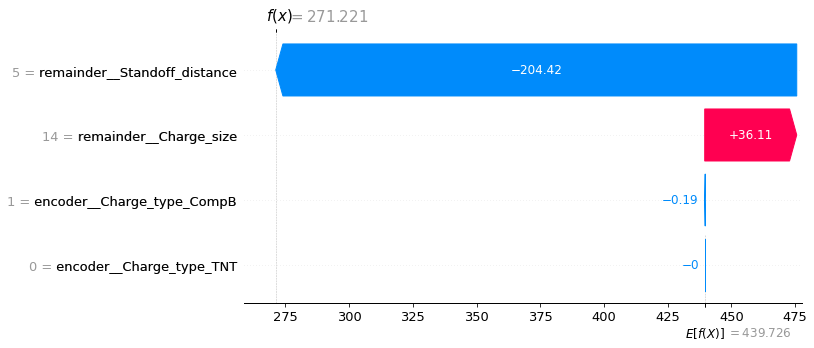

In [14]:
shap.waterfall_plot(shap_values2[56], show=False)
plt.gcf().set_size_inches(10,5)
plt.xticks(fontsize = 15,weight='bold')

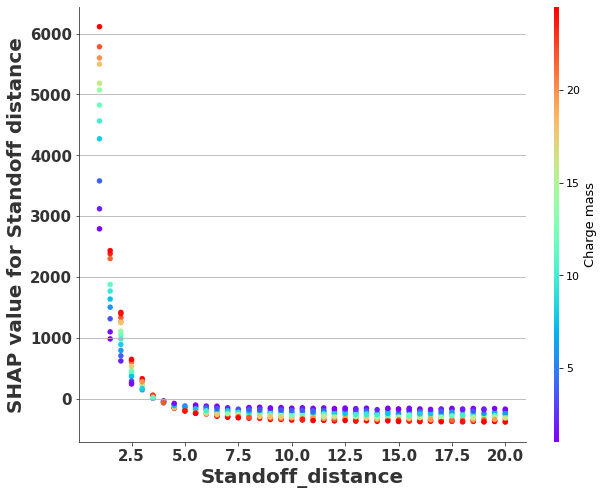

In [30]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Standoff distance", fontsize = 20,weight='bold')
plt.xlabel("Standoff_distance",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

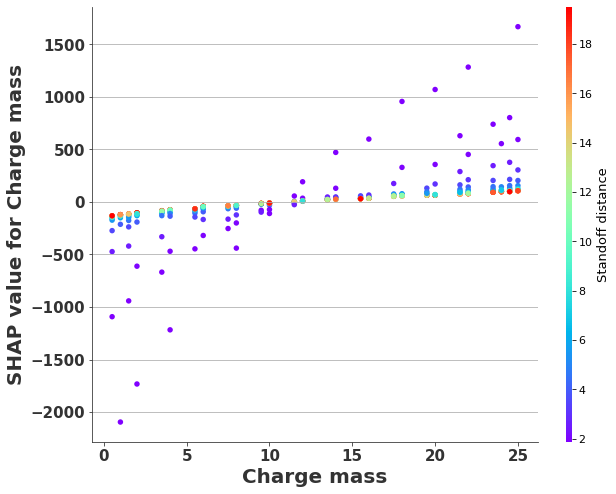

In [15]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

(-200.0, 200.0)

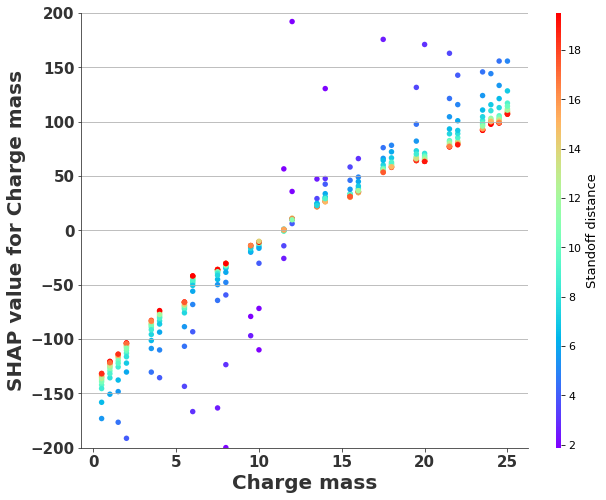

In [31]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')
plt.ylim([-200,200])

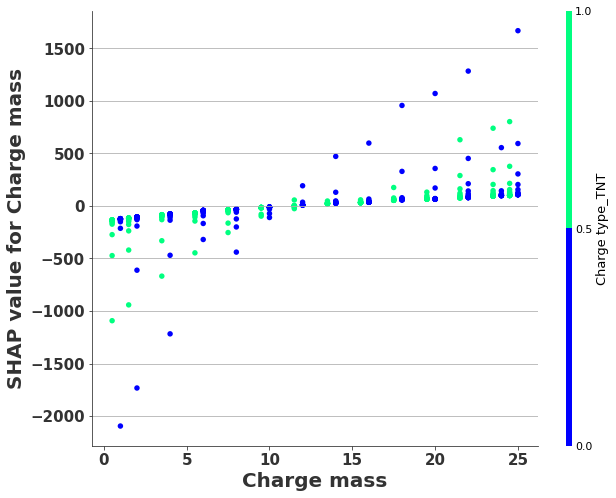

In [16]:
#Partial Dependenace Plot
shap.dependence_plot(2, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))
plt.gcf().set_size_inches(10,8)
plt.ylabel("SHAP value for Charge mass", fontsize = 20,weight='bold')
plt.xlabel("Charge mass",fontsize = 20,weight='bold')
plt.yticks(fontsize = 15,weight='bold')
plt.xticks(fontsize = 15,weight='bold')
plt.grid (visible = True, which = 'major', axis = 'y')

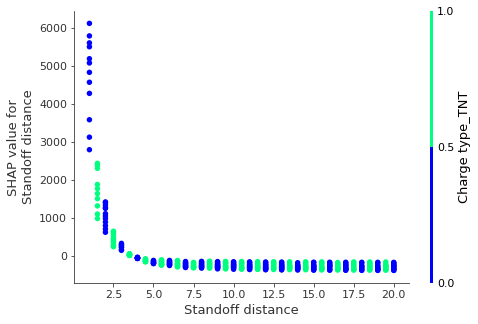

In [17]:
#Partial Dependenace Plot
shap.dependence_plot(3, shap_values, X_train, feature_names = features, interaction_index = 1, show=False, dot_size = 30, cmap=plt.get_cmap("winter"))

In [18]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00019
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.13914
Feature: 3, Score: 0.86067
